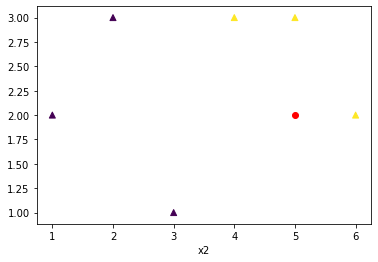

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

x_train=[[1., 2.], [2., 3.], [3., 1.], [4., 3.], [5., 3.], [6., 2.]]
y_train = [[0.], [0.], [0.], [1.], [1.], [1.]]

x_test=[[5., 2.]]
y_test=[[1.]]

x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

colors = [int(y[0] % 3) for y in y_train]
plt.scatter(x1, x2, c=colors, marker='^')
plt.scatter(x_test[0][0], x_test[0][1], c='red')
plt.xlabel('x1')
plt.xlabel('x2')
plt.show()

In [12]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
#x_train은 1 * 2꼴의 행렬, y_train은 1 * 1꼴의 행렬
W = tf.Variable(tf.zeros([2, 1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

In [13]:
def logistic_regression(features):
    #sigmoid function
    hypothesis = tf.divide(1., 1. + tf.exp(-tf.matmul(features, W) + b))
    return hypothesis

In [14]:
def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1-labels)*tf.math.log(1-hypothesis))
    return cost

In [15]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
# SGD는 확률적 경사 하강법. 속도가 개선되지만 정확성은 떨어짐

In [16]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    
    #tf.cast함수는 텐서를 새로운 형태로 캐스팅하는데 사용
    # 0., 1.으로..
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    return accuracy

In [19]:
def grad(features, labels):
    with tf.GradientTape() as tape:
        hypothesis = logistic_regression(features)
        loss_value = loss_fn(hypothesis,labels)
    return tape.gradient(loss_value, [W, b])

for step in range(1001):
    for features, labels in iter(dataset.batch(len(x_train))):
        hypothesis = logistic_regression(features)
        grads = grad(features, labels)
        optimizer.apply_gradients(zip(grads, [W, b]))
        if step % 100 == 0:
            print("Iter: {}, Loss : {:.4f}".format(step, loss_fn(hypothesis, labels)))
            
test_acc = accuracy_fn(logistic_regression(x_test), y_test)
print("Test Result = {}".format(tf.cast(logistic_regression(x_test)>0.5, dtype=tf.int32)))
print("Testset Accuracy : {:.4f}".format(test_acc))

Iter: 0, Loss : 0.6931
Iter: 100, Loss : 0.5781
Iter: 200, Loss : 0.5352
Iter: 300, Loss : 0.5056
Iter: 400, Loss : 0.4840
Iter: 500, Loss : 0.4673
Iter: 600, Loss : 0.4537
Iter: 700, Loss : 0.4421
Iter: 800, Loss : 0.4320
Iter: 900, Loss : 0.4229
Iter: 1000, Loss : 0.4145
Test Result = [[1]]
Testset Accuracy : 1.0000
